# Extra details of the mathematics behind probability formulae

> This document isn't essential for understanding how the stroke outcome model works.

This document digs into some of the details of the logistic functions that define the change of outcome probability with time.

## Notebook setup

In [3]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

## Load data

In [8]:
# Time of no effect:
t_ne = 8.0  # hours

In [14]:
df_constants = pd.read_csv('probs_time_constants.csv', index_col=0)

df_constants

,nlvo_ivt_A,nlvo_ivt_b,lvo_ivt_A,lvo_ivt_b,lvo_mt_A,lvo_mt_b
mrs,,,,,,
0,-0.282636,-0.177905,-2.061295,-0.147351,-0.787214,-0.276300
1,0.532217,-0.109930,-1.386294,-0.090905,-0.263622,-0.213008
2,1.036698,-0.114895,-0.720071,-0.056837,0.209022,-0.162171
3,1.722319,-0.137186,-0.060990,-0.047460,0.891870,-0.158096
4,2.574277,-0.139128,0.838796,-0.036570,1.733804,-0.143360
5,3.085734,-0.133017,1.459413,-0.033607,2.347684,-0.141715


In [19]:
mrs_cprob_all = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

mrs_cprob_all

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.401178,0.538419,0.652112,0.809754,0.918978,0.960000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


Pick out these values for the examples here:

In [20]:
A = df_constants['lvo_mt_A']
b = df_constants['lvo_mt_b']

In [21]:
mRS_prob_cumsum_t0_treatment = mrs_cprob_all.loc['t0_treatment_lvo_mt'].values
mRS_prob_cumsum_no_effect = mrs_cprob_all.loc['no_effect_lvo_mt_deaths'].values

## Why do the probability lines bend differently?

In the graph of probability with time, the lines for each mRS follow a different path. The gradient of the bottom mRS$\leq$0 line becomes less negative with increasing time, as though gradually curving upwards, whereas the top mRS$\leq$4 line has a gradient becoming more negative with time, as though curving downwards. 

The reason for this is best explained by showing a similar line, another logistic function, with a new parameter $v=-b(t+\frac{A}{b})$, so 

$$ P(v) = \frac{1}{1+e^{v}} $$

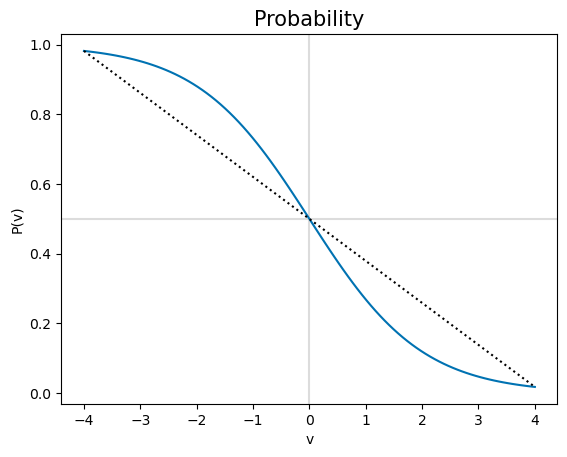

In [6]:
# Define some new parameter "v" for the x-axis:
v = np.linspace(-4,4,100)

# Add a couple of key lines:
plt.axhline(0.5,color='Gainsboro')
plt.axvline(0.0,color='Gainsboro')

# Plot probability as a function of "v":
p_v = 1.0/(1.0+np.exp(v))
plt.plot(v,p_v)

# Draw the straight line connection:
plt.plot([v[0],v[-1]], [p_v[0],p_v[-1]],
        color='k',linestyle=':')

# The usual setup:
plt.ylabel('P(v)')
plt.xlabel('v')
plt.title('Probability', fontsize=15)
plt.show()

The bend of $P(v)$ changes at $v=0$, where $P(v)=0.5$. The $P(\mathrm{mRS})$ lines are different shapes because some of them show mostly the $v>0$ curve (i.e. mRS=0,1), and the rest the $v<0$ part (i.e. mRS$\geq$2). This can be viewed as the $v$-axis here being offset to the right in the $P(t)$ plots above. The size of the offset is different for each mRS line.

The find the offset, we can convert from $v$ to $t$. Because $v=-b(t+\frac{A}{b}) =-(A+bt)$, then $t=-\frac{1}{b}(v+A)$. On the $t$-axis, the key point corresponding to $v=0$ is $t_k=-\frac{A}{b}$. This $t_k$ is different for each of the mRS lines, which is why each $P(t)$ line shows a different shift sideways from $P(v)$.  

We can plot the $P(t)$ lines again and add the key points where the bend changes:

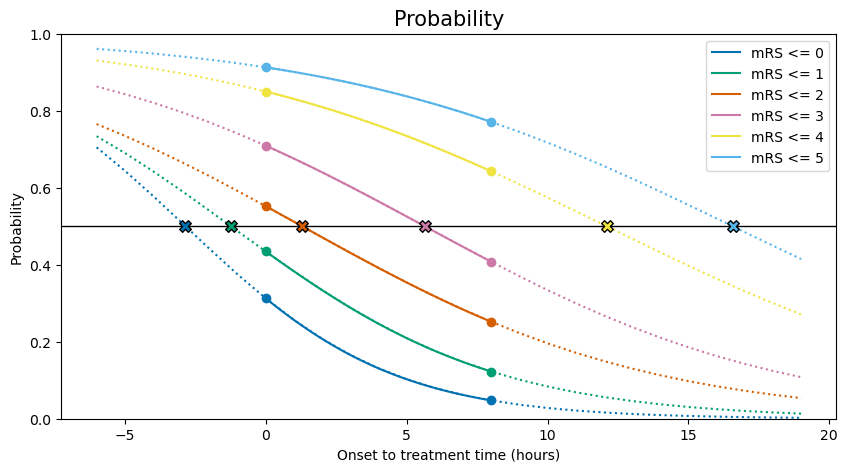

In [22]:
t = np.arange(0,t_ne+0.1,0.1)
t_long = np.arange(-6, t_ne+12)

# Store the key times t_k in this list:
tk_list = []

# Use a wider figure than usual:
plt.figure(figsize=(10,5))
for i,A_i in enumerate(A):    
    # Plot probability:
    p_i = np.exp(A_i + b[i]*t)/(1+np.exp(A_i + b[i]*t))
    l, = plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    
    # Plot probability over the longer time range:
    p_long = np.exp(A_i + b[i]*t_long)/(1+np.exp(A_i + b[i]*t_long))
    plt.plot(t_long, p_long, color=colour, linestyle=':')
    
    # Mark t=0 and t=t_ne data:
    plt.scatter(0,    mRS_prob_cumsum_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mRS_prob_cumsum_no_effect[i], color=colour)
    
    # Calculate the key time and store it:
    t_k = -A_i/b[i]
    tk_list.append(t_k)
    plt.scatter(t_k, np.exp(A_i + b[i]*t_k)/(1+np.exp(A_i + b[i]*t_k)),
                facecolor=colour, edgecolor='k', 
                marker='X', s=70, zorder=3)
    
# # Add vertical lines at valid time boundaries:
# for v_pos in [0.0, t_ne]:
#     plt.axvline(v_pos, lw=1, color='Gainsboro', zorder=0)
    
# Add a horizontal line at P=0.5:
plt.axhline(0.5, lw=1, color='k', zorder=0)

# The usual setup:
plt.ylim(0,1)
plt.ylabel('Probability')
plt.xlabel('Onset to treatment time (hours)')
plt.legend(loc='best')
plt.title('Probability', fontsize=15)
plt.show()

Note that the scattered points above at $t=t_k$ all share a probability $P(t=t_k)=0.5$.

Print the key times:

In [23]:
print('mRS | Key time')
for i in range(6):
    print(f' {i}  | {int(tk_list[i]):2.0f} hours '+
          f'{np.abs(np.array(tk_list[i]))%1 *60.0:2.0f} mins')

mRS | Key time
 0  | -2 hours 51 mins
 1  | -1 hours 14 mins
 2  |  1 hours 17 mins
 3  |  5 hours 38 mins
 4  | 12 hours  6 mins
 5  | 16 hours 34 mins


## What do $A$ and $b$ mean for probability?

We have defined probability as a logistic function:

$$ P = \frac{1}{1+e^{-b\left(t +\frac{A}{b}\right)}} $$

Changing _A_ and _b_ then changes the slope of the function and its offset left and right. 

To see these changes, we'll plot a logistic function with an arbitrary _A_ and _b_:

In [24]:
A_start = -0.91 
b_start = -0.5

And compare it with probability data $P(\mathrm{mRS}\leq \mathrm{mRS}_x)$ for this value of mRS$_x$ where we know the target values of _A_ and _b_:

In [25]:
mRS_x = 3

A_target = A[mRS_x]
b_target = b[mRS_x]

print(A_target, b_target)

0.8918699522503979 -0.1580959999968494


We'll also plot over this time range, which is longer than usual: 

In [26]:
t = np.arange(-t_ne-0.1,t_ne+0.1,0.1)

To save repeating some code, we'll put the plot setup into this function: 

In [27]:
def plot_probs_logistic():
    # Mark the central point of the standard logistic function:
    plt.axvline(0.0, color='k', lw=1)
    plt.axhline(0.5, color='k', lw=1)

    # Plot the two known data points for this mRS:
    plt.scatter([0.0,t_ne], 
                [mRS_prob_cumsum_t0_treatment[mRS_x],
                 mRS_prob_cumsum_no_effect[mRS_x]], 
                label='Data', zorder=3)

    # The usual setup:
    plt.ylim(0.0,1.0)
    plt.ylabel('P(t)')
    plt.xlabel('t (hours)')
    plt.title('Probability', fontsize=15)

First, we'll plot the effect of changing _A_. At time zero, $ P(t=0) = \frac{1}{1+e^{-A}} $ so _A_ adjusts the x-offset of the curve. We can show this by plotting a series of curves where everything is identical except for _A_:

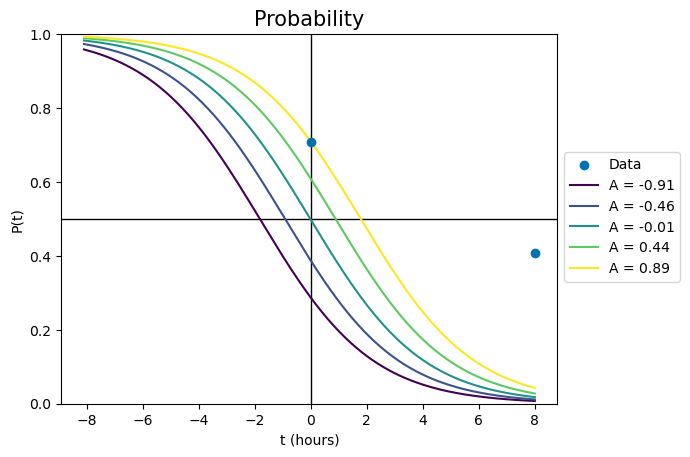

In [28]:
plot_probs_logistic()

# Plot lines for this many values of A...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines))

# Plot probability as a function of time:
for i,A_line in enumerate(np.linspace(A_start, A_target, n_lines)):
    p_t = 1.0/(1.0+np.exp(-b_start * (t + A_line/b_start)) )
    plt.plot(t,p_t, color=colours[i], label=f'A = {A_line:1.2f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

For the palest line, changing _A_ has fixed the probability line in the right spot at time zero. However, the line is currently nowhere near the data point at the no-effect time. To fix this, we have to change the value of _b_. 

Changing _b_ effectively changes two things simultaneously. It changes the slope of the line, so that the logistic function looks more flattened out or stretched tall. But since _b_ cannot change the value of the probability at time zero, changing _b_ must also move the probability line left or right to account for the changes. This is seen in the following plot, where every parameter of each curve is identical except for _b_. The palest yellow line is the same as in the previous plot.

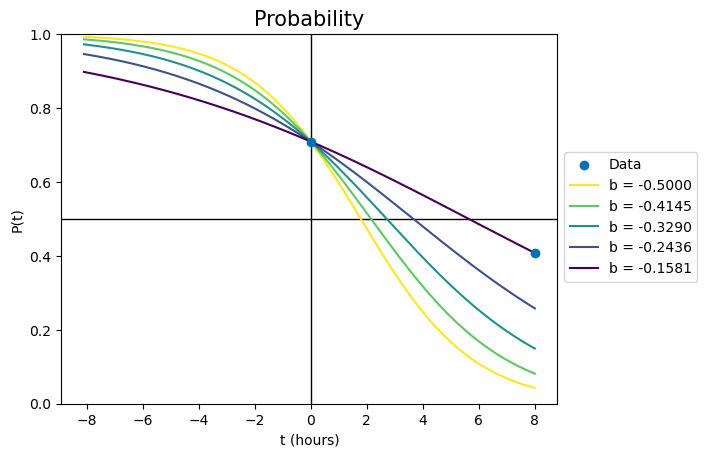

In [29]:
plot_probs_logistic()

# Plot lines for this many values of b...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines)[::-1])

for i,b_line in enumerate(np.linspace(b_start, b_target, n_lines)):
    # Plot probability as a function of time:
    p_t = 1.0/(1.0+np.exp(-b_line * (t + A_target/b_line)) )
    plt.plot(t,p_t, color=colours[i], label=f'b = {b_line:1.4f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

Each line has a different slope because of the changed _b_, but also a different x-offset - the lines cross $P(t)=0.5$ at different times. The darkest line uses the only combination of _A_ and _b_ that will pass through both data points simultaneously. 

Since our calculated $P(\mathrm{mRS})$ lines all use different values of _A_ and _b_, we end up plotting each line with a different slope and x-offset.